In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df= pd.read_csv("D:\Python\Data Science\Datasets-main\emails.csv")

In [3]:
df.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [4]:
df.tail(10)

,text,spam
5718,"Subject: altos na gas model kim , i know you ...",0
5719,Subject: power market research i came across ...,0
5720,Subject: re : visit to houston fyi - - - - -...,0
5721,Subject: ees risk management presentations for...,0
5722,Subject: re : vacation vince : i just found ...,0
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [5]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [7]:
ham = df [df ['spam']==0]

In [8]:
spam = df [df['spam']==1]

In [9]:
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [10]:
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [11]:
print("Spam Percentage: ", (len(spam)/len(df)) *100,'%')

Spam Percentage:  23.88268156424581 %


In [12]:
print("Ham Percentage: ", (len(ham)/len(df)) *100,'%')

Ham Percentage:  76.11731843575419 %


<Axes: ylabel='count'>

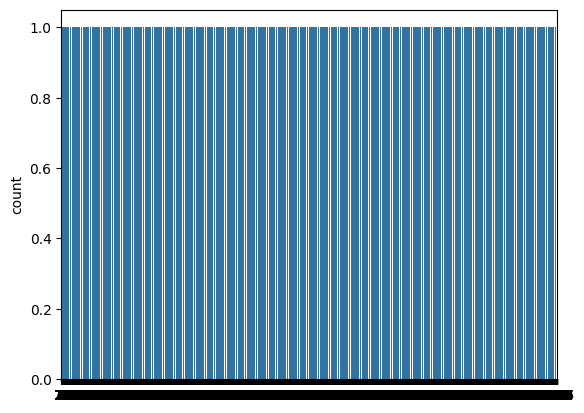

In [13]:
sns.countplot(df['spam'],label='Spam vs Ham')

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
spamham_countVectorizer=vectorizer.fit_transform(df['text'])

In [18]:
print(vectorizer.get_feature_names_out())

['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']


In [19]:
spamham_countVectorizer.shape

(5728, 37303)

In [21]:
label = df['spam']
x= spamham_countVectorizer
y=label

In [22]:
x.shape

(5728, 37303)

In [23]:
y.shape

(5728,)

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2)

In [25]:
from sklearn.naive_bayes import MultinomialNB

In [27]:
NB_classifier = MultinomialNB()
NB_classifier.fit(x_train,y_train)

MultinomialNB()

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [31]:
y_predict_train = NB_classifier.predict(x_train)
y_predict_train

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [32]:
cm= confusion_matrix(y_train,y_predict_train)

<Axes: >

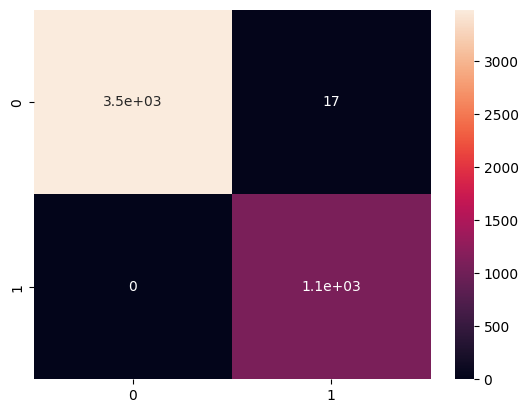

In [33]:
sns.heatmap(cm,annot=True)

In [34]:
y_predict_test = NB_classifier.predict(x_test)

In [35]:
y_predict_test

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
cm = confusion_matrix(y_test,y_predict_test)

<Axes: >

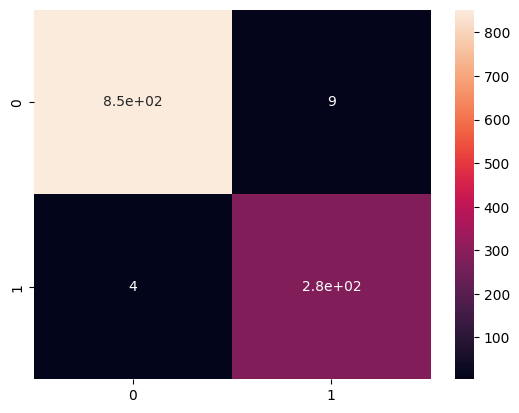

In [38]:
sns.heatmap(cm,annot=True)

In [41]:
print("Classification Report: ")
print(classification_report(y_test,y_predict_test))

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       861
           1       0.97      0.99      0.98       285

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.98      1146
weighted avg       0.99      0.99      0.99      1146



In [42]:
print("Accuracy Score: ")
print(accuracy_score(y_test,y_predict_test))

Accuracy Score: 
0.9886561954624782


In [44]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test,y_predict_test))

Confusion Matrix: 
[[852   9]
 [  4 281]]
